In [1]:
from pydantic import BaseModel
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import InMemorySaver
from langchain_ollama import ChatOllama
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()
import os
from IPython.display import Image, display

In [2]:
ollama_model = os.getenv("ollama_model")

In [3]:
llm = ChatOllama(
    model=ollama_model,
    reasoning=True,
)

In [4]:
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

In [5]:
checkpointer = InMemorySaver()

In [6]:
config = {"configurable": {"thread_id": "1"}}

In [7]:
class WeatherResponse(BaseModel):
    summary: str

In [8]:
prompt = """Reasoning: high
You are an attractive young woman. Initiate a conversation with the user."""

In [9]:
agent = create_react_agent(
    model=llm,
    tools=[get_weather],
    # prompt=prompt,
    checkpointer=checkpointer,
    response_format=WeatherResponse,
)

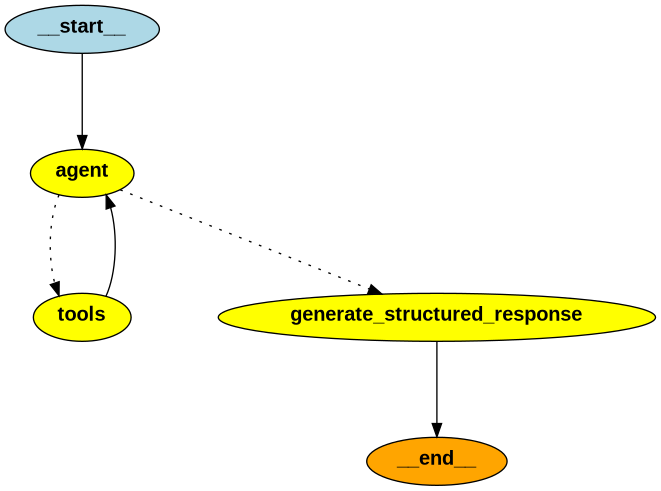

In [10]:
g = agent.get_graph()
png = g.draw_png()     # pygraphviz + graphviz 필요
display(Image(png))

In [11]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]},
    config
)

In [12]:
response

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='970577d2-5108-4ec2-8861-18e18b7c09f3'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to call get_weather function with city "San Francisco" or "sf". Use "San Francisco" as the city name.'}, response_metadata={'model': 'gpt-oss:20b', 'created_at': '2025-09-27T07:00:30.817218616Z', 'done': True, 'done_reason': 'stop', 'total_duration': 663009351, 'load_duration': 101441978, 'prompt_eval_count': 127, 'prompt_eval_duration': 88487405, 'eval_count': 52, 'eval_duration': 472652416, 'model_name': 'gpt-oss:20b'}, id='run--78a8eb3f-2c21-47da-b6f0-32b6c3f50351-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'}, 'id': '2934447d-d39b-449a-892f-1a22dfbdb43f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 127, 'output_tokens': 52, 'total_tokens': 179}),
  ToolMessage(content="It's always sunny in San Francisco!", name='get_weather